##### Paulo José Pereira Jr

### 1) Quantas vezes um aluno precisa fazer uma determinada disciplina para ter aprovação

In [389]:
import pandas as pd
arquivo = 'imd_notas.xlsx'
dados = pd.ExcelFile(arquivo).parse()


# põe o dataset em uma lista de lista de lista. em "l[i][j]", o i corresponde a uma matéria e o j a um aluno dessa matéria
disc = []
for i in dados['disciplina_ID'].unique():
    disc.append( dados[ dados['disciplina_ID']==i ] )
l = []
for i in range(0, len(disc)):
    l.append([])
    for j in range(0, len(disc[i]) ):
        l[i].append(disc[i][disc[i]['a_ID']==j])

In [390]:
nota = 0
qnt = 0
all_nota = 0
all_qnt = 0
por_disciplinas = []
por_total = 0
# percorre l, faz a média da quantidade de vezes que uma matéria é paga e todas juntas é paga
for j in range(0, len(l)):
    for i in l[j]:
        if len(i)>0:
            nota = nota + len(i)
            qnt = qnt + 1
            all_nota = all_nota + len(i)
            all_qnt = all_qnt + 1
    por_disciplinas.append(nota/(qnt))
    nota=0
    qnt=0
por_total = all_nota/all_qnt

In [391]:
print("Por disciplinas:")
for i in range(0,len(por_disciplinas)):
    print("\tdisciplina[",end='')
    print(i,end=']')
    print(":",end=' ')
    print(por_disciplinas[i],end='\n\n')
print("Geral:")
print("\t", por_total)

Por disciplinas:
	disciplina[0]: 1.4029535864978904

	disciplina[1]: 1.0449612403100774

	disciplina[2]: 1.1774193548387097

	disciplina[3]: 1.576158940397351

	disciplina[4]: 1.0673684210526315

	disciplina[5]: 1.5099206349206349

	disciplina[6]: 1.2987012987012987

Geral:
	 1.2666666666666666


### 2)Quais as regiões tem mais índices de aprovação nos componentes curriculares? Histograma

Foram gerados três gráficos. um com a quantidade de materias pagas por bairro, outro com a quantidade de aprovados por bairro. o terceiro é a porcentagem de aprovação(aprovados/materias pagas) dos 10 bairros com mais materias pagas.

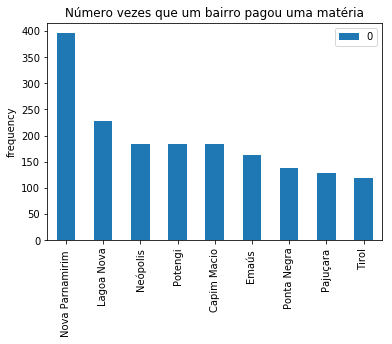

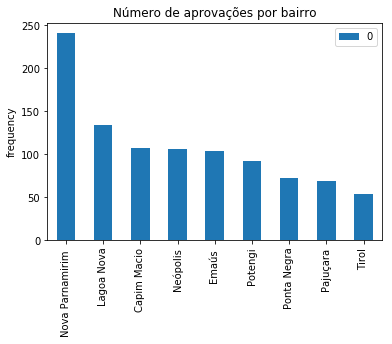

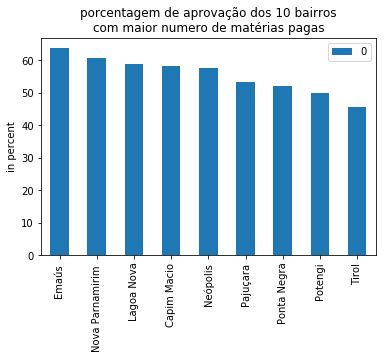

In [500]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline
arquivo = 'imd_notas_02.xlsx'
dados = pd.ExcelFile(arquivo).parse()

# Extrai a quantidade de vezes o aluno de um bairro paga uma matéria e põe em um dicionário tal que:
# {<Bairro>:<número de vezes>}
frequency_total = Counter(dados["bairro"])
frequency_total_dict = dict(frequency_total.most_common(10)[1:])
# Transforma o dicionário em dataframe e exibe num gráfico bar
df = pd.DataFrame.from_dict(frequency_total_dict,orient='index')
df.plot(kind='bar')
plt.title("Número vezes que um bairro pagou uma matéria")
plt.ylabel("frequency")
plt.show()

# extrai a quantidade de vezes o aluno de um bairro é aprovado e põe em um dicionário tal que:
# {<Bairro>:<número de vezes>}
aprovados = dados[dados["status.disciplina"]=="Aprovado"]
bairro_aprovados = aprovados["bairro"]
frequency_aprovados = Counter(bairro_aprovados)
frequency_aprovados_dict = dict(frequency_aprovados.most_common(10)[1:])
# Transforma o dicionário em dataframe e exibe num gráfico bar
df = pd.DataFrame.from_dict(frequency_aprovados_dict, orient='index')
df.plot(kind='bar')
plt.title("Número de aprovações por bairro")
plt.ylabel("frequency")
plt.show()

# Cálculo da porcentagem e armazenação em dicionário
percentage = {}
for i in frequency_total_dict:
    percentage[i] = frequency_aprovados[i]*100/frequency_total[i]
df = pd.DataFrame.from_dict(percentage, orient='index')
df.sort_values(0,ascending=False,inplace=True)
# Transformação do dicionário em dataframe e exibição num gráfico bar
df.plot(kind='bar')
plt.title("porcentagem de aprovação dos 10 bairros\ncom maior numero de matérias pagas")
plt.ylabel("in percent")
plt.show()

### 3) Como estão caracterizados a estatística de notas das diversas disciplinas que compões o dataset? Boxplot
a) Por período

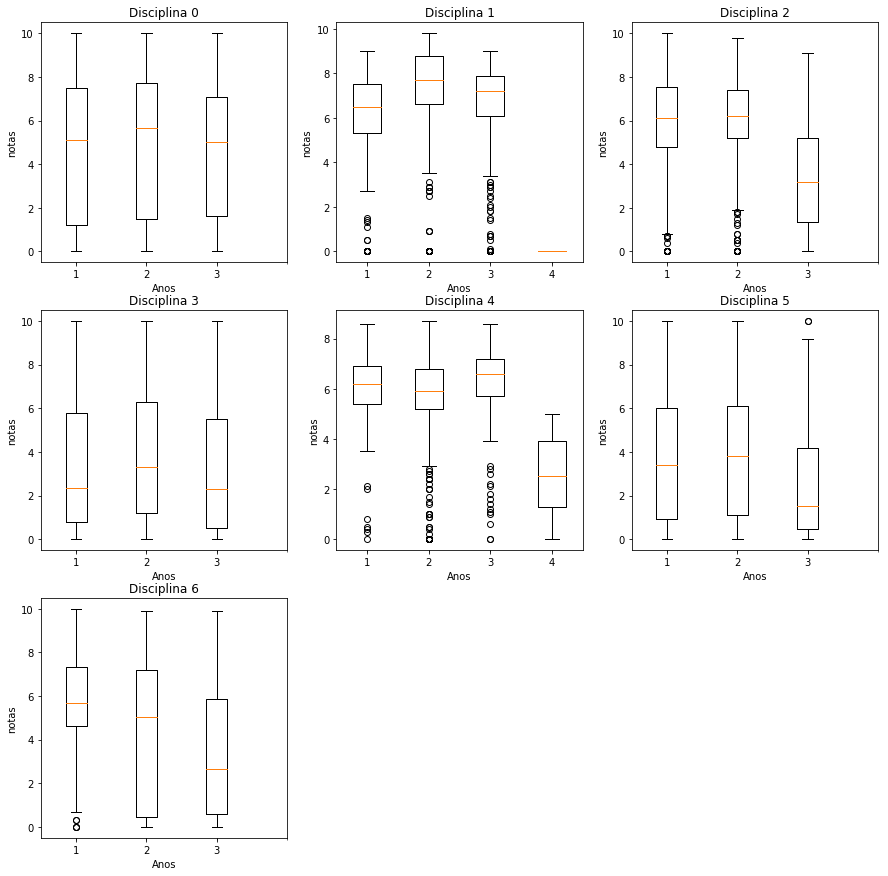

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

arquivo = 'imd_notas.xlsx'
dados = pd.ExcelFile(arquivo).parse()


fig = plt.figure(figsize=(15,15))

for i in range(0,7):
    axes = fig.add_subplot(3,3,i+1)
    a = dados[dados["disciplina_ID"]==i]
    b = []
    for j in a["ano_disciplina"].unique():
        b.append(a[a["ano_disciplina"]==j]["nota"].tolist())
    axes.boxplot(b)
    axes.set_title("Disciplina " + str(i))
    a = ["2014", "2015", "2016","2017"]
    axes.set_xticks(range(1,5), a)
    axes.set_ylabel("notas")
    axes.set_xlabel("Anos")
plt.show()

b) geral

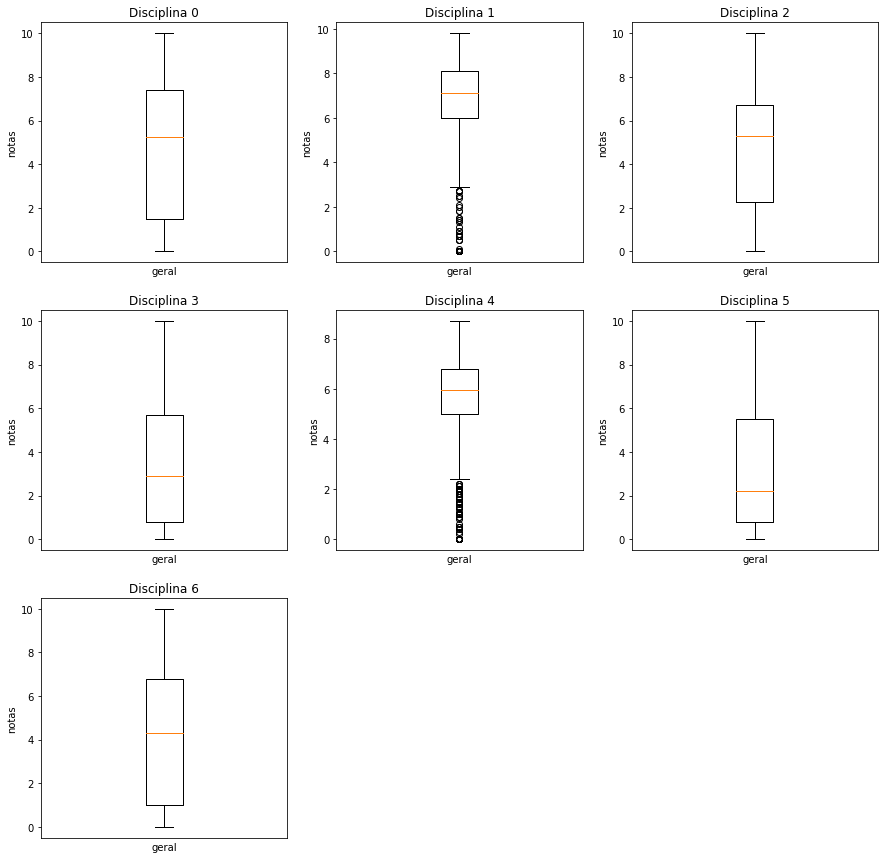

In [65]:
fig = plt.figure(figsize=(15,15))

for i in range(0,7):
    a = dados[dados["disciplina_ID"]==i]["nota"].tolist()
    axes = fig.add_subplot(3,3,i+1)
    axes.boxplot(a)
    axes.set_title("Disciplina "+str(i))
    axes.set_ylabel("notas")
    axes.set_xlabel("geral")
    axes.set_xticks([])
plt.show()

### 4) Existe correlação entre as notas dos diferentes componentes curriculares?

Gráficos de dispersão:
    Nota de uma disciplina x e y por um aluno que passou por média nelas. Todas as combinações possíveis de matérias, sem repetições, foram feitas.

			 Comparação das notas dos alunos entre várias disciplinas duas a duas


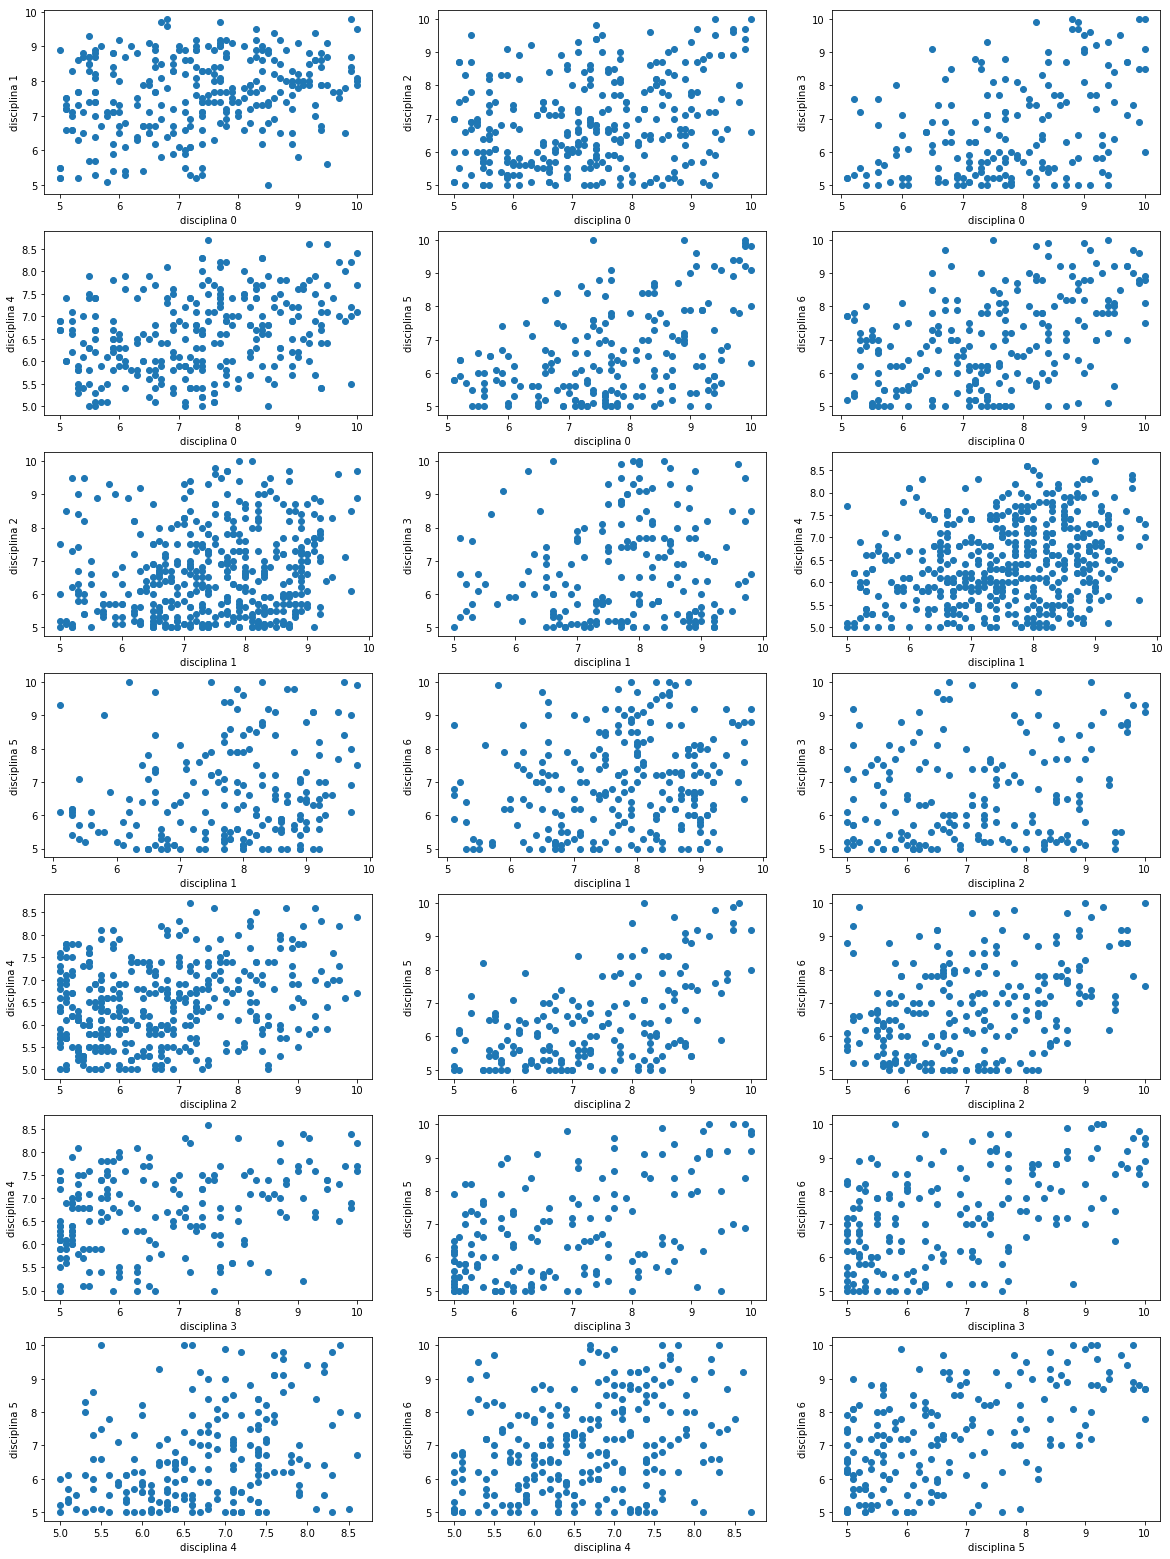

time executing the program: 10.00131654102006 segundos


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import timeit
%matplotlib inline




arquivo = 'imd_notas.xlsx'
dados = pd.ExcelFile(arquivo).parse()

start_time = timeit.default_timer()


componentes = dados["disciplina_ID"].unique()
aprovados = dados[dados["status.disciplina"]=="Aprovado"]

print("\t\t\t Comparação das notas de alunos aprovados entre várias disciplinas duas a duas")
fig = plt.figure(figsize=(20,40))
#looping through all combinations (len(components), 2) of disciplina
q = 1
for i in componentes:
    for j in componentes:
        if j>i:
            x = []
            y = []
            aprovados_discipline_i = aprovados[aprovados["disciplina_ID"]==i]
            aprovados_discipline_j = aprovados[aprovados["disciplina_ID"]==j]
            for k in aprovados_discipline_i["a_ID"]:
                if k in aprovados_discipline_j["a_ID"].tolist():
                    arb = aprovados_discipline_i[aprovados_discipline_i["a_ID"]==k]["nota"].tolist()[0]
                    x.append(arb)
                    arb = aprovados_discipline_j[aprovados_discipline_j["a_ID"]==k]["nota"].tolist()[0]
                    y.append(arb)
            axes = fig.add_subplot(10,3,q)
            q = q + 1
            axes.scatter(x,y)
            axes.set_xlabel("disciplina " + str(i))
            axes.set_ylabel("disciplina " + str(j))
plt.show()




# code you want to evaluate
elapsed = timeit.default_timer() - start_time
print("time executing the program: " + str(elapsed) + " segundos")

### 5) Existe uma relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho?

Gráfio de dispersão:
    Número médio de disciplinas cursadas por semestre e sua nota média.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import timeit
%matplotlib inline
arquivo = 'imd_notas.xlsx'
dados = pd.ExcelFile(arquivo).parse()

In [76]:
#número médio de disciplinas cursadas por semestre
aluno_dis = [] # aluno_dis[x] -> numero médio de disciplinas cursadas por semestre pelo aluno x.

#############################################################################################
#função que retorna o numero medio de disciplinas pagas por semestre por um determinado aluno.
def media_disciplina(numero_aluno):

    #dados do aluno0 dataframe
    aluno = dados[dados["a_ID"]==numero_aluno]

    #semestres do aluno0 series
    aluno_semestres = aluno["periodo_disciplina"].unique()
    
    #qnt de semestres desse aluno. int
    aluno_semestres_qnt = len(aluno_semestres)

    #qnt de disciplinas em cada semestre
    disciplinas_cadasemestre = []
    for i in aluno_semestres:
        disciplinas_cadasemestre.append(len(aluno[aluno["periodo_disciplina"]==i]))
    
    #média dos numeros de disciplina
    total=0
    for i in disciplinas_cadasemestre:
        total += i

    media_disc = total/len(disciplinas_cadasemestre)
    return media_disc
#############################################################################################

alunos_IDs = dados["a_ID"].unique()
for i in alunos_IDs:
    aluno_dis.append(media_disciplina(i))

In [77]:
#nota média do aluno

aluno_notam = [] #aluno_notam[x] <- nota média do aluno x


#################################################
#Função que retorna a média das notas de um aluno
def media_nota(numero_aluno):
    #dataset do aluno
    aluno = dados[dados["a_ID"]==numero_aluno]

    #series das notas do aluno
    notas = aluno["nota"]

    #media
    total = 0
    for i in notas:
        total+=i
    media_notas = total/len(notas)
    
    return media_notas
#################################################

alunos_IDs = dados["a_ID"].unique()
for i in alunos_IDs:
    aluno_notam.append(media_nota(i))

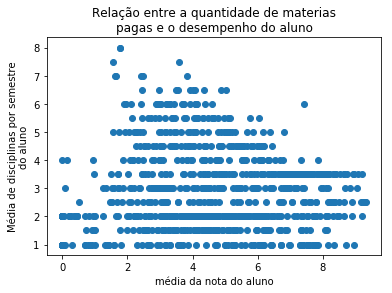

In [369]:
plt.scatter(aluno_notam, aluno_dis)
plt.ylabel("Média de disciplinas por semestre\ndo aluno")
plt.xlabel("média da nota do aluno")
plt.title("Relação entre a quantidade de materias\npagas e o desempenho do aluno")
plt.show()

### 6) Existe correlação entre a nota do enem e o status do aluno?

Histograma:
    nota do enem x status do aluno

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import timeit
%matplotlib inline
arquivo = 'imd_notas.xlsx'
dados = pd.ExcelFile(arquivo).parse()

#Separação de alunos por range na nota do enem
alunos = []
for i in range(0,len(dados)):
    #série da posição i do dataframe
    aluno_series = dados.loc[i]
    #nota do aluno correspondente a essa série
    nota = aluno_series['enen-nota']
    #analisa o range dessa nota e armazena no vetor
    
    #variável criada para facilmente variar o range
    r = 10
    for j in range(0,r):
        if len(alunos)<=j:
            alunos.append([])
        if nota>=(j*(500/r))+500 and nota < ((j+1)*(500/r))+500:     
            alunos[j].append(aluno_series)

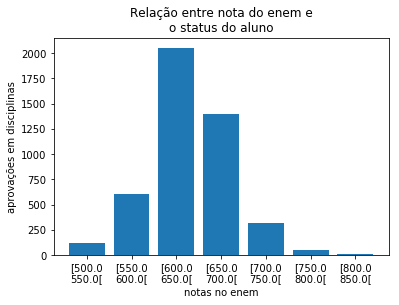

In [64]:
array = []
for i in alunos:
    array.append(len(i))
a = []
for i in range(0,r):
    a.append(i)
plt.bar(a[:r-3],array[:r-3])
notas = []
for i in range(0,r-3):
    notas.append("[" +str((i*(500/r))+500) + "\n" + str(((i+1)*(500/r))+500) + "[")
plt.xticks(range(0,r-3),notas)
plt.xlabel("notas no enem")
plt.ylabel("aprovações em disciplinas")
plt.title("Relação entre nota do enem e\no status do aluno")
plt.show()

### 7)Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do enem? Disperção

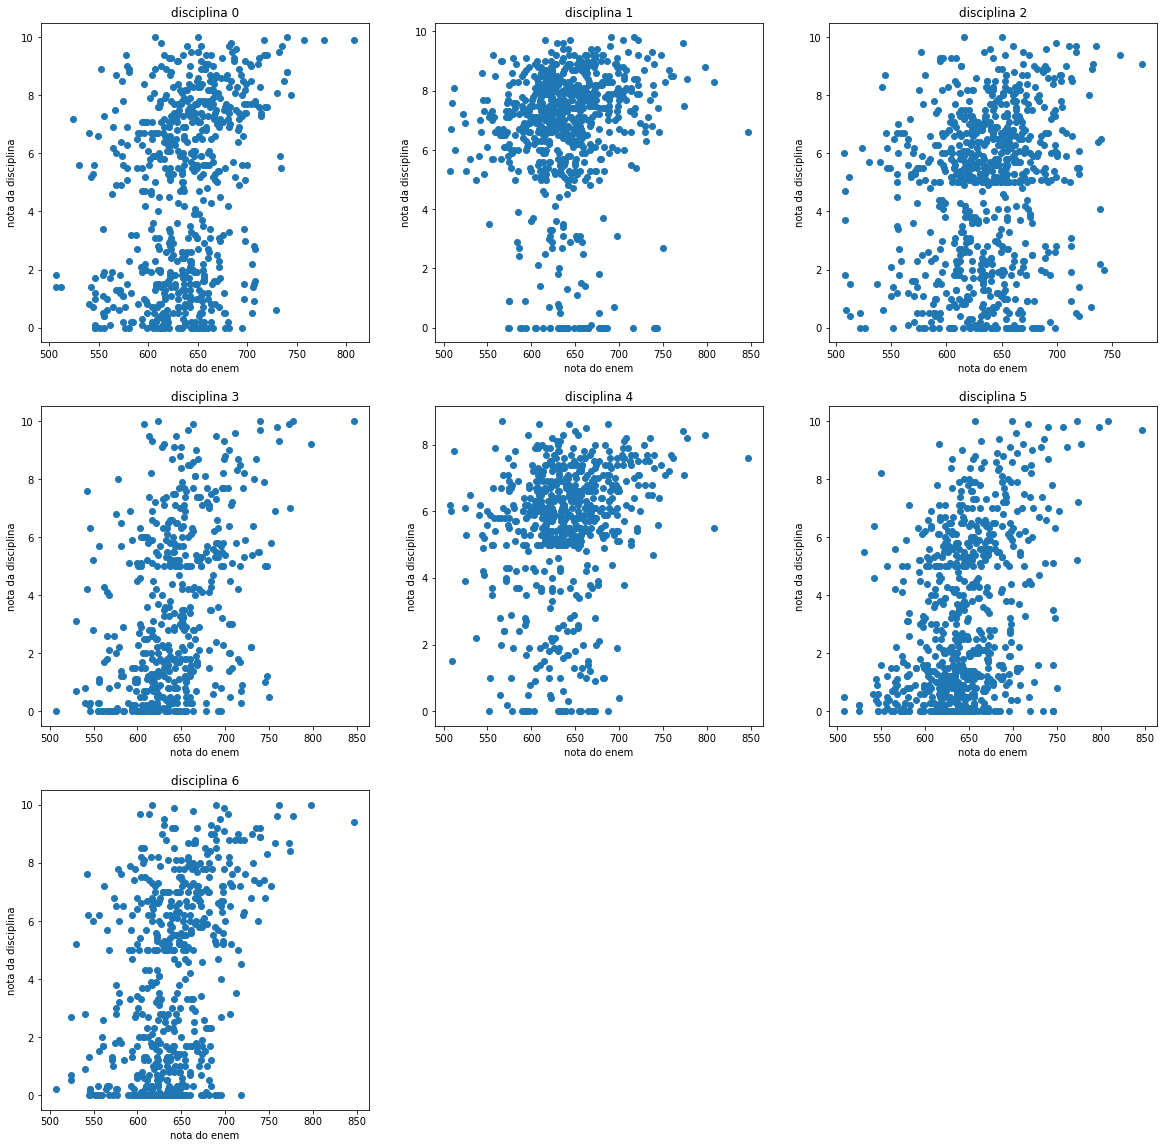

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import timeit
%matplotlib inline
arquivo = 'imd_notas.xlsx'
dados = pd.ExcelFile(arquivo).parse()
#Separação de alunos por range na nota do enem
dis = {}
for i in range(0,len(dados["disciplina_ID"].unique())):
    dis[i] = []
    dis[i].append([])
    dis[i].append([])
for i in range(0,len(dados)):
    #série da posição i do dataframe
    aluno_series = dados.loc[i]
    #nota do aluno correspondente a essa série
    dis[aluno_series["disciplina_ID"]][0].append(aluno_series["enen-nota"])
    dis[aluno_series["disciplina_ID"]][1].append(aluno_series["nota"])
    
fig = plt.figure(figsize=(20,20))
for i in range(0,len(dados["disciplina_ID"].unique())):
    axes = fig.add_subplot(3,3,i+1)
    axes.scatter(dis[i][0], dis[i][1])
    axes.set_title("disciplina " + str(i))
    axes.set_xlabel("nota do enem")
    axes.set_ylabel("nota da disciplina")
plt.show()